## The Sparks Foundation GRIP 

### -------------------------------------------------------------------------------------------------------

### Task 2: Prediction using Unsupervised ML
* From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Name: Vishal Barad

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Reading dataset

In [2]:
df = pd.read_csv("Dataset/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Dropping unnecessary columns

In [4]:
df.drop(['Id','Species'],axis=1,inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Importing KMeans model 

In [6]:
from sklearn.cluster import KMeans

In [7]:
x = df.iloc[:,:3].values

#### Take different-different values of k and chaenk sum of squared error and choose best k value

In [8]:
k = list()
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

#### Plot k value vs sum of suqared error and choose the value of k as an elbow point (means after this point value of sum of squared error will be decreased). This is called elbow method

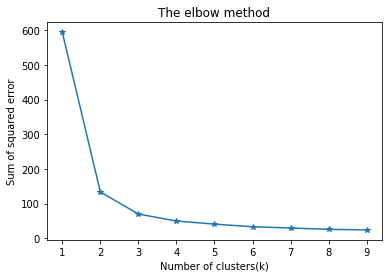

In [9]:
plt.plot(range(1, 10),k,marker='*')
plt.title('The elbow method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of squared error')
plt.show()

#### Select K=3 (Elbow point)

In [10]:
km = KMeans(n_clusters = 3)

In [11]:
km.fit(x)

KMeans(n_clusters=3)

#### Prediction

In [12]:
pred = km.predict(x)
df['cluster'] = pred

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


####  Visualising the clusters - On the first two columns

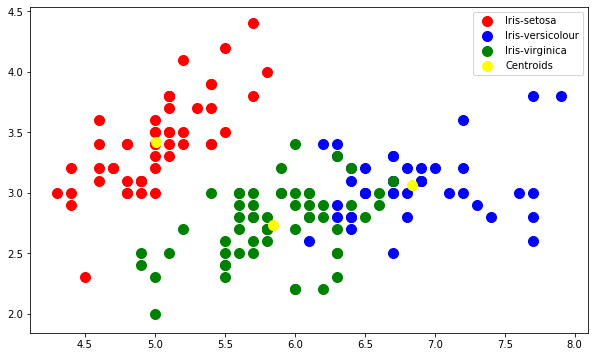

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()